<a href="https://colab.research.google.com/github/ChahatUpadhyay/AI_Smartinez_Work/blob/main/Jellyfish_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
# Instead of from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical  # Import to_categorical directly from tensorflow.keras.utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical  # No longer needed here
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical  # No longer needed here
# from sklearn.model_selection import train_test_split  # No longer needed here
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.model_selection import train_test_split  # No longer needed here
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import os

In [3]:
Moon_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/Moon_jellyfish"
barrel_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/barrel_jellyfish"
blue_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/blue_jellyfish"
compass_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/compass_jellyfish"
lions_mane_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/lions_mane_jellyfish"
mauve_stinger_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/mauve_stinger_jellyfish"

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to a fixed size for the model
            images.append(img)
    return images

Moon_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/Moon_jellyfish"
barrel_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/barrel_jellyfish"
blue_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/blue_jellyfish"
compass_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/compass_jellyfish"
lions_mane_jellyfish_folder = "/content/drive/MyDrive/JellyFIsh/lions_mane_jellyfish"
mauve_stinger_jellyfish = "/content/drive/MyDrive/JellyFIsh/mauve_stinger_jellyfish"

# Load images and labels for each emotion
Moon_images = load_images_from_folder(Moon_jellyfish_folder)
barrel_images = load_images_from_folder(barrel_jellyfish_folder)
blue_images = load_images_from_folder(blue_jellyfish_folder)
compass_images = load_images_from_folder(compass_jellyfish_folder)
lions_mane_images = load_images_from_folder(lions_mane_jellyfish_folder)
mauve_stinger_images = load_images_from_folder(mauve_stinger_jellyfish_folder)


# Create labels for each emotion category
Moon_labels = [0] * len(Moon_images)
barrel_labels = [1] * len(barrel_images)
blue_labels = [2] * len(blue_images)
compass_labels = [3] * len(compass_images)
lions_mane_labels = [4] * len(lions_mane_images)
mauve_stinger_labels = [5] * len(mauve_stinger_images)

all_labels = Moon_labels+barrel_labels+blue_labels+compass_labels+lions_mane_labels+mauve_stinger_labels


In [4]:
print('Moon_jellyfish_images: ',len(Moon_images))
print('barrel_jellyfish_images: ',len(barrel_images))
print('blue_jellyfish_images: ',len(blue_images))
print('compass_jellyfish_images: ',len(compass_images))
print('lions_mane_jellyfish_images: ',len(lions_mane_images))
print('mauve_stinger_jellyfish_images: ',len(mauve_stinger_images))

Moon_jellyfish_images:  150
barrel_jellyfish_images:  150
blue_jellyfish_images:  150
compass_jellyfish_images:  150
lions_mane_jellyfish_images:  150
mauve_stinger_jellyfish_images:  150


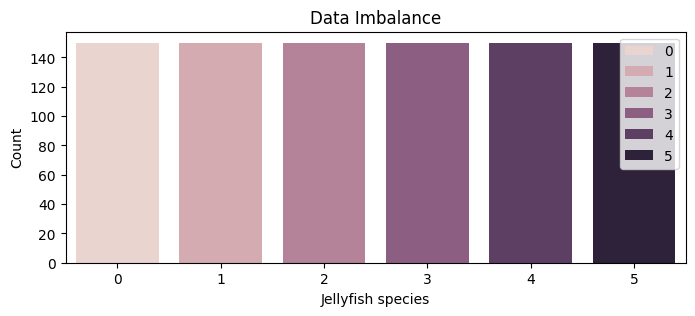

In [5]:
# Data Imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(x=all_labels, hue=all_labels)
plt.title('Data Imbalance')
plt.xlabel('Jellyfish species')
plt.ylabel('Count')
plt.show()

In [6]:
# Concatenate images and labels
X = np.array(Moon_images + barrel_images + blue_images + compass_images + lions_mane_images + mauve_stinger_images)
y = np.array(Moon_labels + barrel_labels + blue_labels + compass_labels + lions_mane_labels + mauve_stinger_labels)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 6)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)

def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        img_resized = np.expand_dims(img_resized, axis=-1)
        img_resized = np.repeat(img_resized, 3, axis=-1)  # Add three channels to convert grayscale to RGB
        resized_images.append(img_resized)
    return np.array(resized_images)

X_train_resized_resnet = resize_images(X_train, input_shape_resnet)

In [8]:
X_train_resized_densenet = resize_images(X_train, input_shape_densenet)

In [9]:
X_train_resized_efficientnet = resize_images(X_train, input_shape_efficientnet)

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Training and Evaluation</div>

<div style="background-color:#ffb7cc; padding: 20px;">For ResNet, DenseNet, and EfficientNet, we first load their pre-trained versions from the Keras library with weights trained on ImageNet. We remove their top classification layer, which was originally designed for ImageNet's 1000 classes, and add our custom classification head tailored for our task with three output classes (happy, sad, and angry). This new classification head is appended to the base models' output using global average pooling to extract meaningful features from the images.After adding the custom classification head, we compile each model using categorical cross-entropy as the loss function and the Adam optimizer</div>

In [11]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define input shapes for each model
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)

# Updated function to resize images and handle both grayscale and RGB images
def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        if len(img_resized.shape) == 2:  # Grayscale image
            img_resized = np.expand_dims(img_resized, axis=-1)
            img_resized = np.repeat(img_resized, 3, axis=-1)
        resized_images.append(img_resized)
    return np.array(resized_images)

# Resize training images for each architecture
X_train_resized_resnet = resize_images(X_train, input_shape_resnet)
X_train_resized_densenet = resize_images(X_train, input_shape_densenet)
X_train_resized_efficientnet = resize_images(X_train, input_shape_efficientnet)

# -------------------------
# ResNet50 Model
# -------------------------
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape_resnet)
resnet_base_model.trainable = False

resnet_global_avg_pooling = GlobalAveragePooling2D()(resnet_base_model.output)
resnet_output = Dense(6, activation='softmax')(resnet_global_avg_pooling)
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_output)

resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# -------------------------
# DenseNet121 Model
# -------------------------
densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape_densenet)
densenet_base_model.trainable = False

densenet_global_avg_pooling = GlobalAveragePooling2D()(densenet_base_model.output)
densenet_output = Dense(6, activation='softmax')(densenet_global_avg_pooling)
densenet_model = Model(inputs=densenet_base_model.input, outputs=densenet_output)

densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# -------------------------
# EfficientNetB0 Model
# -------------------------
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape_efficientnet)
efficientnet_base_model.trainable = False

efficientnet_global_avg_pooling = GlobalAveragePooling2D()(efficientnet_base_model.output)
efficientnet_output = Dense(6, activation='softmax')(efficientnet_global_avg_pooling)
efficientnet_model = Model(inputs=efficientnet_base_model.input, outputs=efficientnet_output)

efficientnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-7)

# -------------------------
# Train the models
# -------------------------
print("Training ResNet50 model...")
resnet_history = resnet_model.fit(X_train_resized_resnet, y_train, batch_size=32, epochs=200,
                                 validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

print("\nTraining DenseNet121 model...")
densenet_history = densenet_model.fit(X_train_resized_densenet, y_train, batch_size=32, epochs=200,
                                      validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

print("\nTraining EfficientNetB0 model...")
efficientnet_history = efficientnet_model.fit(X_train_resized_efficientnet, y_train, batch_size=32, epochs=200,
                                              validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# -------------------------
# Evaluation on test data
# -------------------------
# Resize test images for each model
X_test_resized_resnet = resize_images(X_test, input_shape_resnet)
X_test_resized_densenet = resize_images(X_test, input_shape_densenet)
X_test_resized_efficientnet = resize_images(X_test, input_shape_efficientnet)

print("\nEvaluating models on test data:")
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test_resized_resnet, y_test)
print("ResNet50 Test accuracy:", resnet_accuracy)

densenet_loss, densenet_accuracy = densenet_model.evaluate(X_test_resized_densenet, y_test)
print("DenseNet121 Test accuracy:", densenet_accuracy)

efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_test_resized_efficientnet, y_test)
print("EfficientNetB0 Test accuracy:", efficientnet_accuracy)

# Summarize final results
print("\nFinal Test Accuracies:")
print("ResNet50    :", resnet_accuracy)
print("DenseNet121 :", densenet_accuracy)
print("EfficientNetB0:", efficientnet_accuracy)


Training ResNet50 model...
Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 842ms/step - accuracy: 0.1721 - loss: 2.0020 - val_accuracy: 0.1528 - val_loss: 1.8570 - learning_rate: 0.0010
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.1567 - loss: 1.8312 - val_accuracy: 0.1597 - val_loss: 1.8212 - learning_rate: 0.0010
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.2256 - loss: 1.7905 - val_accuracy: 0.1250 - val_loss: 1.7979 - learning_rate: 0.0010
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.1850 - loss: 1.7954 - val_accuracy: 0.1528 - val_loss: 1.8027 - learning_rate: 0.0010
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.1790 - loss: 1.7834 - val_accuracy: 0.1944 - val_loss: 1.8096 - learning_rate: 0.0010
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.2353 - loss: 1.7721 - val_accuracy: 0.1944 - val_loss: 1.7642 - learning_rate: 0.0010
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step 

In [12]:

# -------------------------
# Evaluation on test data
# -------------------------
# Resize test images for each model
X_test_resized_resnet = resize_images(X_test, input_shape_resnet)
X_test_resized_densenet = resize_images(X_test, input_shape_densenet)
X_test_resized_efficientnet = resize_images(X_test, input_shape_efficientnet)

print("\nEvaluating models on test data:")
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test_resized_resnet, y_test)
print("ResNet50 Test accuracy:", resnet_accuracy)

densenet_loss, densenet_accuracy = densenet_model.evaluate(X_test_resized_densenet, y_test)
print("DenseNet121 Test accuracy:", densenet_accuracy)

efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_test_resized_efficientnet, y_test)
print("EfficientNetB0 Test accuracy:", efficientnet_accuracy)

# Summarize results
print("\nFinal Test Accuracies:")
print("ResNet50    :", resnet_accuracy)
print("DenseNet121 :", densenet_accuracy)
print("EfficientNetB0:", efficientnet_accuracy)


Evaluating models on test data:
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4058 - loss: 1.5115
ResNet50 Test accuracy: 0.3722222149372101
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9811 - loss: 0.0798
DenseNet121 Test accuracy: 0.9722222089767456
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1607 - loss: 1.7937
EfficientNetB0 Test accuracy: 0.15000000596046448

Final Test Accuracies:
ResNet50    : 0.3722222149372101
DenseNet121 : 0.9722222089767456
EfficientNetB0: 0.15000000596046448


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Learning and Accuracy Curve</div>

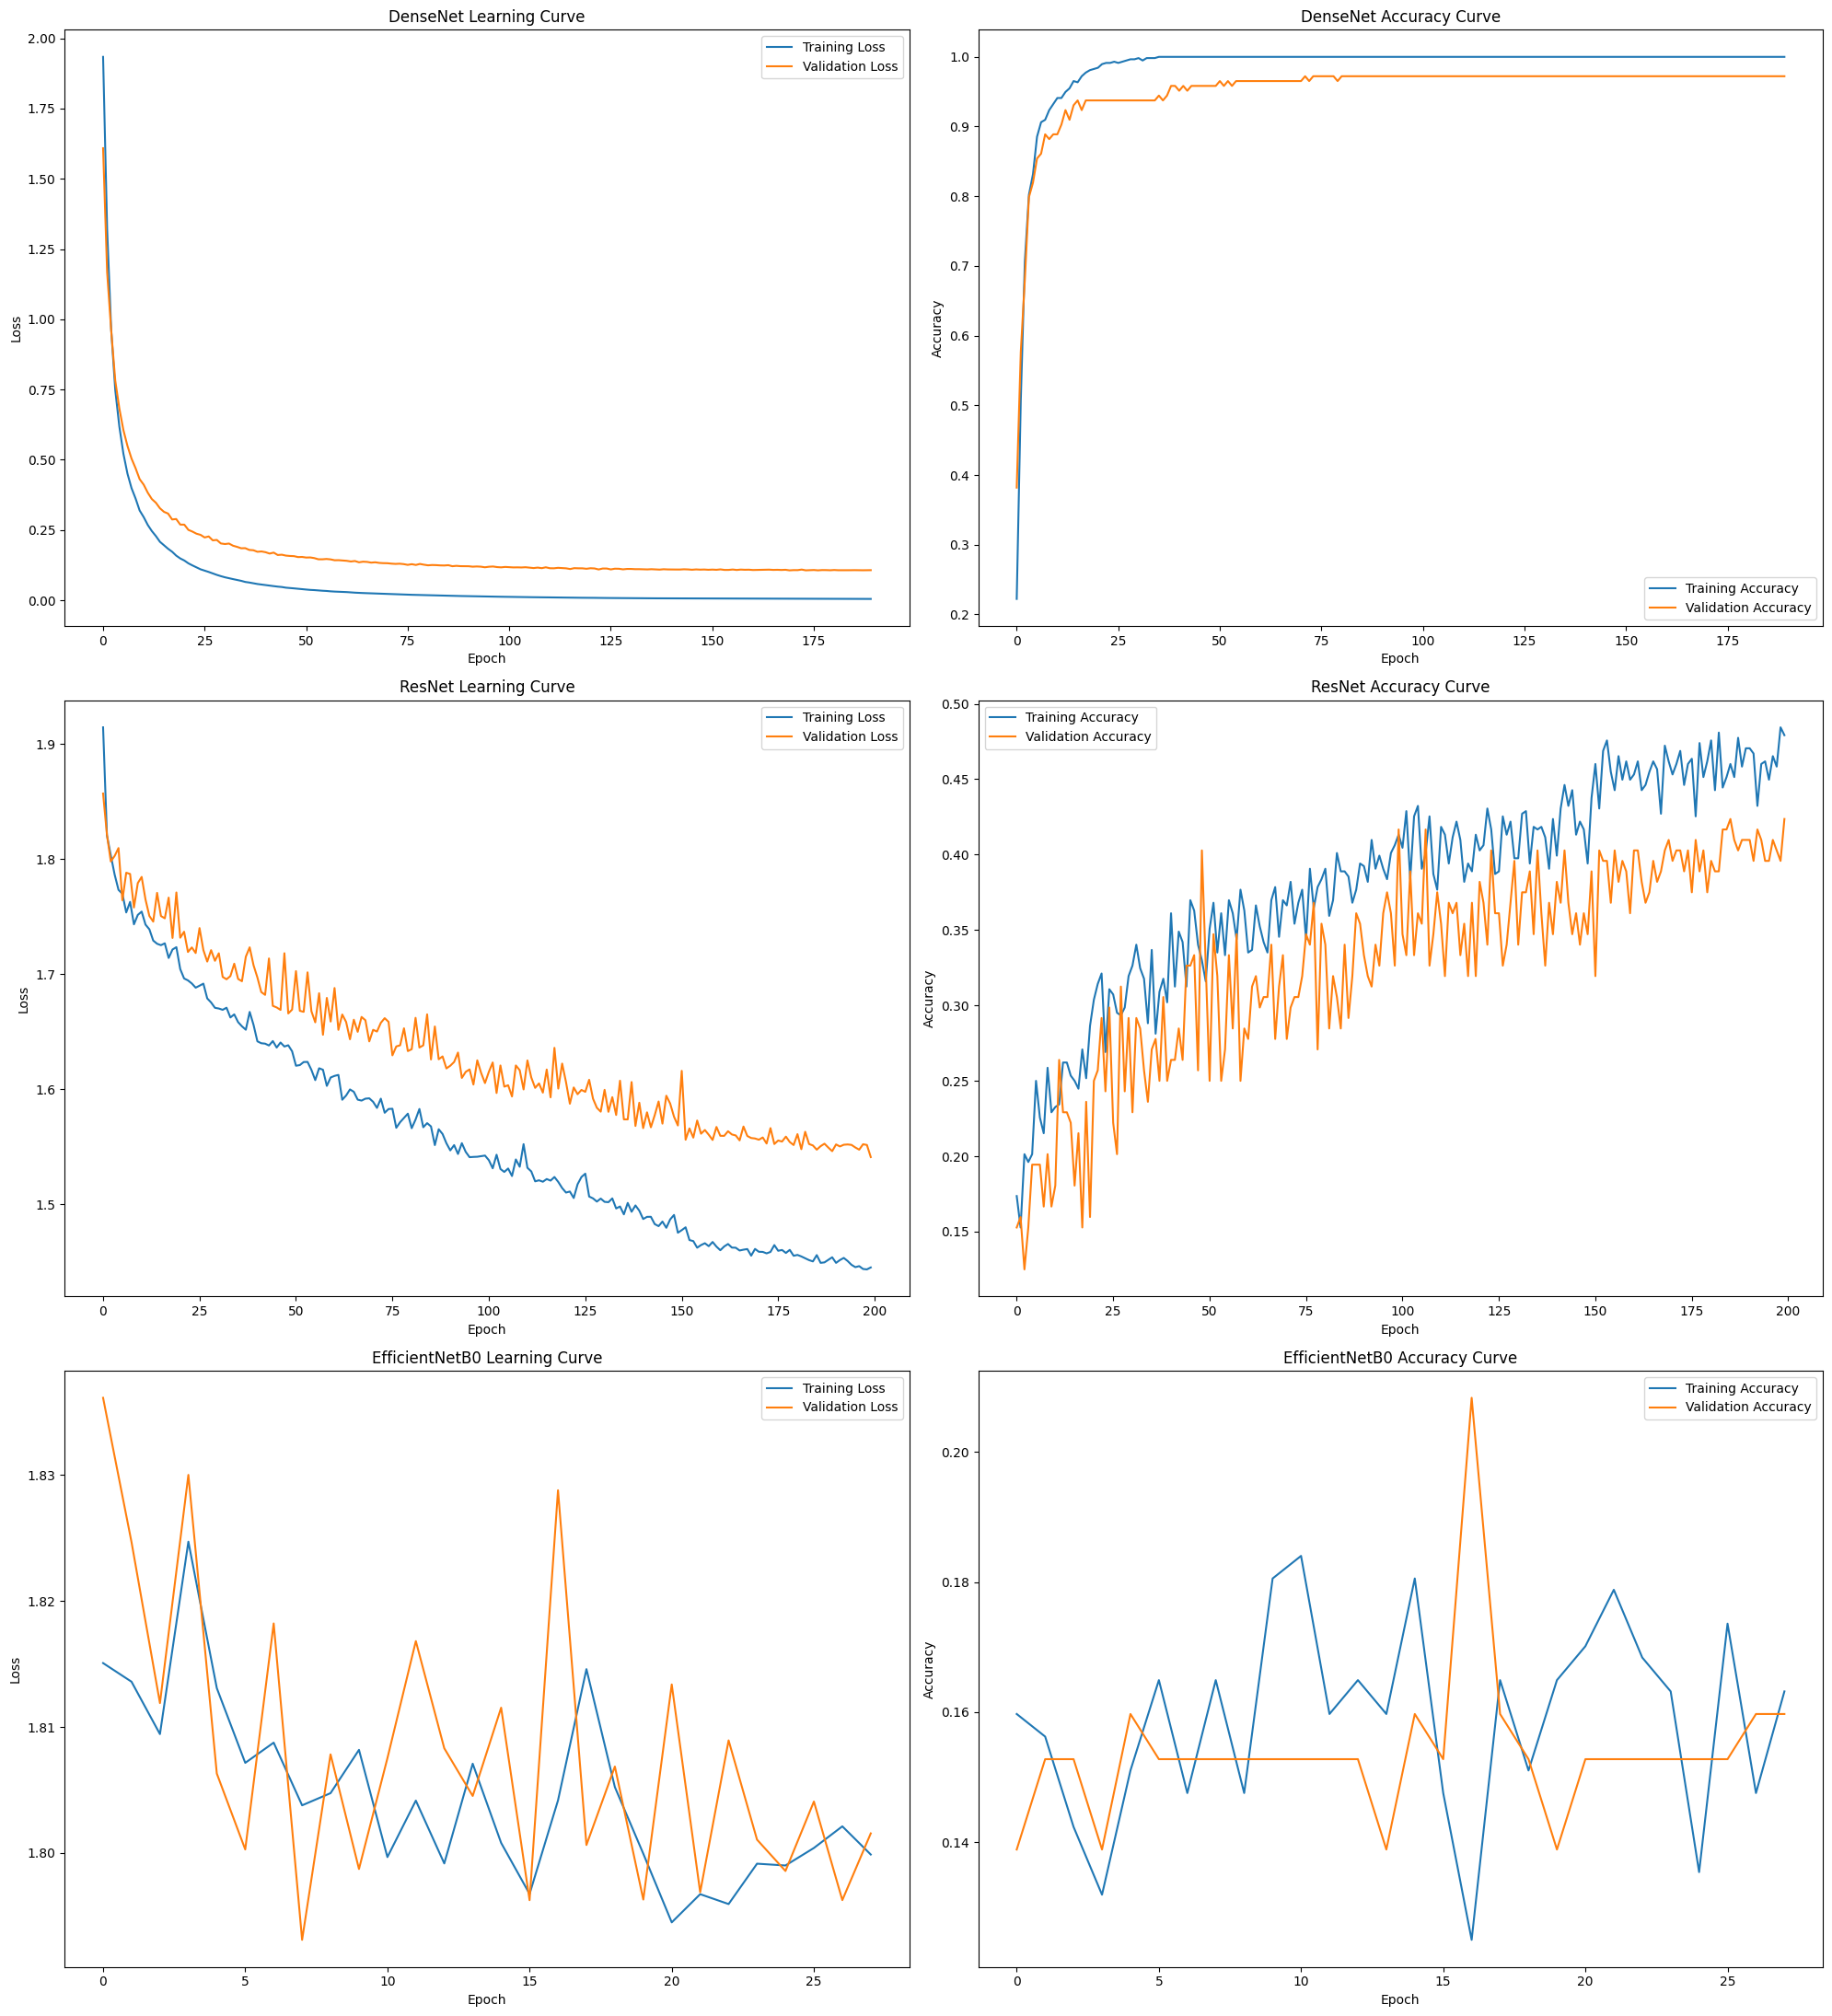

In [13]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Create subplots for all three models: DenseNet, ResNet, EfficientNet
fig, axs = plt.subplots(3, 2, figsize=(20, 22))

# Plot DenseNet curves
plot_learning_curves(densenet_history, 'DenseNet', axs[0, 0])
plot_accuracy_curves(densenet_history, 'DenseNet', axs[0, 1])

# Plot ResNet curves
plot_learning_curves(resnet_history, 'ResNet', axs[1, 0])
plot_accuracy_curves(resnet_history, 'ResNet', axs[1, 1])

# Plot EfficientNet curves
plot_learning_curves(efficientnet_history, 'EfficientNetB0', axs[2, 0])
plot_accuracy_curves(efficientnet_history, 'EfficientNetB0', axs[2, 1])

plt.tight_layout()
plt.show()


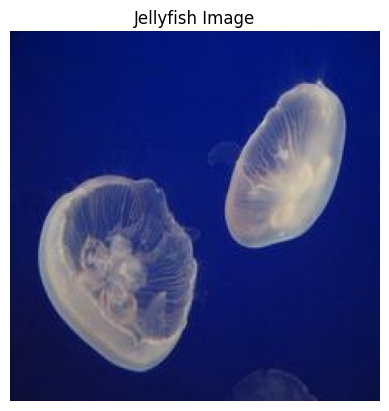

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: Moon Jellyfish
Class Probabilities: [[9.9494731e-01 3.7901674e-04 1.0313508e-03 4.1045609e-05 7.1625305e-05
  3.5295531e-03]]


In [16]:
import cv2
import numpy as np

# Define a mapping from class index to species names (update as needed)
class_names = {
    0: "Moon Jellyfish",
    1: "Barrel Jellyfish",
    2: "Blue Jellyfish",
    3: "Compass Jellyfish",
    4: "Lions Mane Jellyfish",
    5: "Mauve Stinger Jellyfish"
}

def classify_jellyfish(image_path, model, input_shape):
    """
    Classifies a jellyfish image given its file path.

    Parameters:
    - image_path: str, path to the input image.
    - model: Trained Keras model to use for classification.
    - input_shape: tuple, expected input shape (height, width, channels).

    Returns:
    - predicted_class: The name of the predicted jellyfish species.
    - probabilities: The raw probability scores for each class.
    """
    # Load the image from disk
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # Convert BGR (default in OpenCV) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the target dimensions
    img = cv2.resize(img, (input_shape[0], input_shape[1]))

    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255.0

    # Expand dimensions to match model input shape (batch size of 1)
    img = np.expand_dims(img, axis=0)

    # Get predictions from the model
    probabilities = model.predict(img)
    class_idx = np.argmax(probabilities, axis=1)[0]

    # Map the predicted index to the corresponding class name
    predicted_class = class_names.get(class_idx, "Unknown")

    return predicted_class, probabilities

# Example usage:
# Use the EfficientNetB0 model and its corresponding input shape, or change as needed.
image_path = "/content/drive/MyDrive/JellyFIsh/Train_Test_Valid/test/Moon_jellyfish/07.JPG"  # Replace with your image path
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Jellyfish Image")
plt.show()

predicted_class, probs = classify_jellyfish(image_path, densenet_model, input_shape_efficientnet)

print("Predicted Class:", predicted_class)
print("Class Probabilities:", probs)
